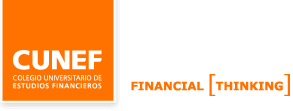

# **Extracción, Transformación y Carga**
## **EXAMEN FINAL ETL**

`Marta Ruedas Burgos`

`Entrega 1 de febrero de 2021`


# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

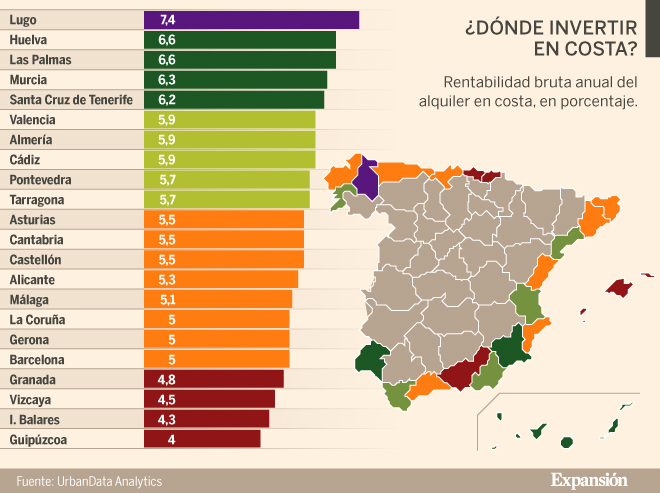

`Imagen extraida del diario económico español fundado el 27 de mayo de 1986, Expansión.`

`Fecha de publicación 8 de junio de 2019.`

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

Inicialización y carga del contesto Spark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Detecta el sistema operativo del ordenador

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

Contexto de Spark-SQL


In [3]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Carga de datos en contexto Spark-SQL

In [19]:
practica_final = "BDpracticafinalCSV.csv"

Se transforma el CSV en formato RDD

In [23]:
practica_final = sc.textFile(practica_final) 

In [24]:
practica_final.take(5)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000']

**PARSEADO**

Se quita el encabezado para los nombres de las columnas.

In [25]:
encabezado = practica_final.take(1)[0]
practica_final = practica_final.filter(lambda x: x != encabezado)

Se separa el punto y coma.

In [31]:
vivienda = practica_final.map(lambda x: x.split(";"))
vivienda.take(2)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000'],
 ['2',
  'RH',
  '80',
  '11622',
  'Lvl',
  'Gtl',
  '5',
  '1961',
  '1961',
  'None',
  'TA',
  'TA',
  '882',
  'TA',
  'Y',
  '1',
  '0',
  '2',
  '1',
  'TA',
  '5',
  '1',
  '730',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '105000']]

Hay una columna donde se encuentran los valores RH, RL y RM y se filtran dichos valores (alta, media y baja densidad).

Objetivo, quedarnos con todos los inmuebles de esas zonas.

In [33]:
vivienda = vivienda.filter(lambda x: x[1] in ['RH','RL','RM'])

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Total viviendas. 

Las viviendas corresponden a la primera columna, X0.

In [37]:
vivienda.map(lambda x: x[0]).count()

2760

Se cuentan los valores distintos. Se estudia si hay duplicados.

In [38]:
vivienda.map(lambda x: x[0]).distinct().count()

2758

Observamos que los números no coinciden, por lo que hay duplicados en el dataset. 

Se encuentran 2758 viviendas sin repetirse entre ellas.

Se repiten dos viviendas en el dataset.

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

El total de inmuebles también ejecutado en la pregunta anterior es de 2760.

In [39]:
vivienda.map(lambda x: x[0]).count()

2760

A continuación, se agrupa por zonas y se saca la media del precio.

Se cogen las columnas requeridas. X1 corresponde con la Zona. X28 al Precio de Venta.

Se agrupa por zona. Al hacer la primera selección de columnas el resultado es de dos columnas en ese dataset. La columna 0 y la columna 1. Operación para agrupar.

Finalmente se calcula la media.

In [41]:
precio_vivienda_zona = vivienda.map(lambda x: (x[1], (float(x[28]),1)))
precio = precio_vivienda_zona.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1]))
precio_medio = precio.map(lambda x: (x[0], x[1][0]/x[1][1]))
precio_medio.take(3)

[('RL', 191131.80581241744),
 ('RH', 136419.77777777778),
 ('RM', 126781.39393939394)]

Densidad baja, RL.

Densidad alta, RH.

Densidad media, RM.

## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

Se hace una agrupación. 

La columna, _Year Built_ se encuentran los distintos años, por lo que tenemos que clasificarlos por décadas. 

La columna _Year_ corresponde a x7, donde se cogen las tres primeras letras de cada valor de esta columna.

In [46]:
bsmtyear = vivienda.map(lambda x: (str(x[7])[0:3], (float(x[28]),1)))
bsmtyear = bsmtyear.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1]))
bsmtyear = bsmtyear.map(lambda x: (x[0], x[1][0]/x[1][1]))
bsmtyear.collect()

[('198', 187142.5),
 ('192', 123644.04736842106),
 ('190', 126265.27777777778),
 ('189', 181783.33333333334),
 ('188', 165497.375),
 ('196', 151393.7731092437),
 ('195', 140769.27462686566),
 ('199', 224140.38338658147),
 ('200', 253166.7803030303),
 ('201', 290716.0),
 ('197', 151933.698630137),
 ('194', 126110.4966442953),
 ('191', 129473.213592233),
 ('193', 142995.65420560748),
 ('187', 133666.66666666666)]

El resultado se muestra con la media de superficie _Square feet_ por décadas.

Se filtra la columna 1, que corresponde a la 13 seleccionada anteriormente y la 0 a la 7. 

La columna 1 corresponde a _**Heating QC**_. 

Se quiere extraer todas las que tengan _**Ex**_, signficado _**Excelencia**_.

In [47]:
heatingQC = vivienda.map(lambda x: (str(x[7])[0:3], (x[13])))
heatingQC = heatingQC.filter(lambda x: x[1] in 'Ex')
heatingQC.countByKey()

defaultdict(int,
            {'188': 2,
             '189': 4,
             '190': 12,
             '191': 38,
             '192': 51,
             '193': 40,
             '194': 56,
             '195': 98,
             '196': 88,
             '197': 68,
             '198': 28,
             '199': 233,
             '200': 635,
             '201': 2})

Top 1, la década del 2000 presenta 635 viviendas con calidad excelente acondicionadas para el frío (Heating QC). 



## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Se filtran los años para que queden simplemente los del 2009. 

A continuación, se seleccionan las columnas 0, 7, 3 y 28. 

La columna 3, correspondiente a la columna *Square feet* por lo que se  multiplica por 0.092903 para hacer la conversión a **metros cuadrados**. 

Finalmente se divide el precio por los metros cuadrados. 

In [54]:
viviendas = vivienda.filter(lambda x: x[7] in '2009')
viviendas2 = viviendas.map(lambda x:(x[0],x[7], float(x[3])*0.092903, float(x[28])))
viviendas3 = viviendas2.map(lambda x: (x[3]/x[2], x[0], x[1]))
viviendas3.takeOrdered(50)

[(183.6384929698649, '959', '2009'),
 (189.62589380701857, '242', '2009'),
 (192.1389826794558, '241', '2009'),
 (197.40359194293848, '317', '2009'),
 (205.82029452799293, '252', '2009'),
 (241.67917239803893, '319', '2009'),
 (243.08501194644595, '40', '2009'),
 (263.0565006272093, '447', '2009'),
 (314.8993477588179, '37', '2009'),
 (318.2625726950819, '819', '2009'),
 (347.58294108595527, '428', '2009'),
 (354.8577398882487, '431', '2009'),
 (378.45188690391797, '46', '2009'),
 (418.7236063497275, '39', '2009'),
 (509.6233445670008, '45', '2009')]

Ordeno los resultados de mayor a menor por el precio de metros cuadrados.

In [55]:
viviendas3.takeOrdered(10, lambda x: -x[0])

[(509.6233445670008, '45', '2009'),
 (418.7236063497275, '39', '2009'),
 (378.45188690391797, '46', '2009'),
 (354.8577398882487, '431', '2009'),
 (347.58294108595527, '428', '2009'),
 (318.2625726950819, '819', '2009'),
 (314.8993477588179, '37', '2009'),
 (263.0565006272093, '447', '2009'),
 (243.08501194644595, '40', '2009'),
 (241.67917239803893, '319', '2009')]

## Media anual por zonas del precio de venta y metros cuadrados.

*Se calcula la media por metro cuadrado por año y los precios de venta.*

### **RL**

METROS CUADRADOS DE DENSIDAD BAJA, RL.

In [56]:
RL = vivienda.filter(lambda x: x[1] in 'RL')
RL = RL.map(lambda x: (x[27], (float(x[3])*0.092903, 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RL.collect()

[('2010', 1011.3593166600795),
 ('2007', 1059.6779461064987),
 ('2009', 1002.1840689904019),
 ('2008', 1047.6533375414854),
 ('2006', 1042.8149126639166)]

MEDIA ANUAL DEL PRECIO DE VENTA, RL.

In [57]:
RL_precio = vivienda.filter(lambda x: x[1] in 'RL')
RL_precio = RL_precio.map(lambda x: (x[27], (float(x[28]), 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RL_precio.collect()


[('2010', 184978.418972332),
 ('2007', 193399.98014440434),
 ('2009', 190455.55086372362),
 ('2008', 189885.58515283844),
 ('2006', 193654.14845360824)]

### **RM**

METROS CUADRADOS DE DENSIDAD MEDIA, RM.

In [58]:
RM= vivienda.filter(lambda x: x[1] in 'RM')
RM = RM.map(lambda x: (x[27], (float(x[3])*0.092903, 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RM.collect()

[('2010', 586.1042039137931),
 ('2007', 625.4484220842105),
 ('2009', 552.5560763333336),
 ('2008', 623.6691686341463),
 ('2006', 575.0140103627449)]

MEDIA ANUAL DEL PRECIO DE VENTA, RM.

In [ ]:
RM_precio = vivienda.filter(lambda x: x[1] in 'RM')
RM_precio = RM_precio.map(lambda x: (x[27], (float(x[28]), 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RM_precio.collect()

### **RH**

METROS CUADRADOS DE DENSIDAD ALTA, RH.

In [59]:
RH = vivienda.filter(lambda x: x[1] in 'RH')
RH = RH.map(lambda x: (x[27], (float(x[3])*0.092903, 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RH.collect()

[('2010', 753.0345568),
 ('2007', 651.31970725),
 ('2009', 647.1437173999999),
 ('2008', 766.1400733333334),
 ('2006', 659.5648484999999)]

MEDIA ANUAL DEL PRECIO DE VENTA, RH.

In [ ]:
RH_precio = vivienda.filter(lambda x: x[1] in 'RH')
RH_precio = RH_precio.map(lambda x: (x[27], (float(x[28]), 1))).reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1])).map(lambda x: (x[0], x[1][0]/x[1][1]))
RH_precio.collect()

Se ha dividido por las diferentes zonas de densidad. 

## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

*Suma **total del precio de venta** de las viviendas que han usado piedra como revestimiento.*

Se hace un filtro aplicado a la columna 9 de **materiales** para que seleccionen solo las de **Stone**. 

Después, la columna 28 la del **precio final** y se hace la suma de todas las cantidades. 

In [64]:
piedra = vivienda.filter(lambda x: x[9] in 'Stone')
piedra = piedra.map(lambda x: float(x[28])).sum()
piedra

63687135.0

Suma total del precio de venta de las viviendas que han usado ladrillo.

Ladrillo normal y Ladrillo visto.

Lo mismo aplicado anteriormente pero ahora con los ladrillos.

In [63]:
ladrillo = vivienda.filter(lambda x: x[9] in ['BrkCmn','BrkFace'])
ladrillo = ladrillo.map(lambda x: float(x[28])).sum()
ladrillo

182293036.0

Hay una diferencia significativa. Los de ladrillo recaudan más con una diferencia de 118,605,901.0 comparado con la piedra.

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

*Obtenemos la media de los precios de las viviendas con dos cocinas, con dos o más plazas de garaje.*

Las dos primeras lineas se quitan los valores nulos, tanto de la columna cocina como la de la columna garaje. 

Los NaN se presentan en comillas en el dataset.

* **C** corresponde a Cocina.

* **G** corresponde a Garaje

In [72]:
C_NanOut = vivienda.filter(lambda x: x[18] is not '')
G_NanOut = C_NanOut.filter(lambda x: x[21] is not '')
C_G1 = G_NanOut.map(lambda x: (float(x[18]), float(x[21]), float(x[28])))
C_G1 = C_G1.filter(lambda x: x[0] == 2)
C_G1 = C_G1.filter(lambda x: x[1] >= 2)
C_G1 = C_G1.map(lambda x: x[2])


La media.

In [73]:
C_G1.mean()

145124.27906976745

In [74]:
cuartiles = C_G1.map(lambda x: (x, )).toDF()
cuartiles.approxQuantile("_1",[0.25, 0.5, 0.75], 0)

[118964.0, 141000.0, 159000.0]

Media de los precios de las viviendas con una cocinas y con una plaza de garaje. 

In [67]:
C_NanOut = vivienda.filter(lambda x: x[18] is not '')
G_NanOut = C_NanOut.filter(lambda x: x[21] is not '')
C_G = G_NanOut.map(lambda x: (float(x[18]), float(x[21]), float(x[28])))
C_G = C_G.filter(lambda x: x[0] == 1)
C_G = C_G.filter(lambda x: x[1] == 1)
C_G = C_G.map(lambda x: x[2])

La media.

In [68]:
C_G.mean()

128121.9933774834

Comparación de las medias y los cuartiles de ambos casos.

In [70]:
cuartiles = C_G.map(lambda x: (x, )).toDF()
cuartiles.approxQuantile("_1",[0.25, 0.5, 0.75], 0)

[111500.0, 128000.0, 142125.0]

Observamos el resultado de la comparación de las medias del cuartil inferior, mediana y cuartil superior.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

Se importa la librería del formato SQL.

In [76]:
import pyspark.sql.functions as f

Se selecciona las columnas el garaje de los coches y precio de venta.

In [80]:
viviendaSQL = spark.read.csv("BDpracticafinalCSV.csv", sep=';', header=True)
viviendaSQL = viviendaSQL.select('Garage Cars', 'SalePrice')
viviendaSQL.show()

+-----------+---------+
|Garage Cars|SalePrice|
+-----------+---------+
|          2|   215000|
|          1|   105000|
|          1|   172000|
|          2|   244000|
|          2|   189900|
|          2|   195500|
|          2|   213500|
|          2|   191500|
|          2|   236500|
|          2|   189000|
|          2|   175900|
|          2|   185000|
|          2|   180400|
|          2|   171500|
|          2|   212000|
|          3|   538000|
|          2|   164000|
|          3|   394432|
|          2|   141000|
|          2|   210000|
+-----------+---------+
only showing top 20 rows



Se quitan los NaN.

In [84]:
viviendaSQL = viviendaSQL.na.drop("all")
viviendaSQL.show()

+-----------+---------+
|Garage Cars|SalePrice|
+-----------+---------+
|          2|   215000|
|          1|   105000|
|          1|   172000|
|          2|   244000|
|          2|   189900|
|          2|   195500|
|          2|   213500|
|          2|   191500|
|          2|   236500|
|          2|   189000|
|          2|   175900|
|          2|   185000|
|          2|   180400|
|          2|   171500|
|          2|   212000|
|          3|   538000|
|          2|   164000|
|          3|   394432|
|          2|   141000|
|          2|   210000|
+-----------+---------+
only showing top 20 rows



Las columnas están en tipo caracter. 

Se pasan a tipo numéricas para hacer la correlación.

In [89]:
viviendaSQL = viviendaSQL.withColumn('SalePrice', viviendaSQL['SalePrice'].cast('float'))
viviendaSQL = viviendaSQL.withColumn('Garage Cars', viviendaSQL['Garage Cars'].cast('float'))

In [92]:
viviendaSQL.show() 

+-----------+---------+
|Garage Cars|SalePrice|
+-----------+---------+
|        2.0| 215000.0|
|        1.0| 105000.0|
|        1.0| 172000.0|
|        2.0| 244000.0|
|        2.0| 189900.0|
|        2.0| 195500.0|
|        2.0| 213500.0|
|        2.0| 191500.0|
|        2.0| 236500.0|
|        2.0| 189000.0|
|        2.0| 175900.0|
|        2.0| 185000.0|
|        2.0| 180400.0|
|        2.0| 171500.0|
|        2.0| 212000.0|
|        3.0| 538000.0|
|        2.0| 164000.0|
|        3.0| 394432.0|
|        2.0| 141000.0|
|        2.0| 210000.0|
+-----------+---------+
only showing top 20 rows



**CORRELACIÓN**

In [95]:
relacion_precio_garajes = viviendaSQL.stat.corr("Garage Cars","SalePrice")
relacion_precio_garajes

0.6479583634978916

El resultado de la correlación es **positivo**. 

Esto quiere decir, a medida que suba el precio del nº de garajes de una casa también subirá el precio de la misma. 

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta